In [2]:
import tensorflow as tf
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd

In [3]:
print(tf.__version__)
print(sys.version)

2.10.0
3.10.0 | packaged by conda-forge | (default, Nov 10 2021, 13:20:59) [MSC v.1916 64 bit (AMD64)]


In [27]:
def plot_loss_accuracy(history):
    train_loss = history["loss"]
    val_loss = history["val_loss"]
    train_acc = history["accuracy"]
    val_acc = history["val_accuracy"]
    
    plt.figure()
    plt.plot(train_loss,label="Train Loss")
    plt.plot(val_loss,label="Val Loss")
    plt.title("Loss Plot")
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(train_acc,label="Train Accuracy")
    plt.plot(val_acc,label="Val Accuracy")
    plt.title("Accuracy Plot")
    plt.legend()
    plt.show()    

In [5]:
TRAIN_DATA_DIR = r"D:\CNNtest\MAIN_WORK_FOLDER\Working_Data\Elephants\dataset\train"
TEST_DATA_DIR = r"D:\CNNtest\MAIN_WORK_FOLDER\Working_Data\Elephants\dataset\test"

In [6]:
image_loc = r"D:\CNNtest\MAIN_WORK_FOLDER\Working_Data\Elephants\dataset\train\African\af_tr1.jpg"
sz = os.stat(image_loc)

In [7]:
sz

os.stat_result(st_mode=33206, st_ino=562949953904437, st_dev=372152276, st_nlink=1, st_uid=0, st_gid=0, st_size=10379, st_atime=1700686717, st_mtime=1635658244, st_ctime=1700685060)

In [8]:
Hieght = list()
Width = list()
for folder in os.listdir(TRAIN_DATA_DIR):
    folder_path = os.path.join(TRAIN_DATA_DIR,folder)
    for image in os.listdir(folder_path):
        image_loc = os.path.join(folder_path,image)
        img = Image.open(image_loc)
        w,h = img.size
        Hieght.append(h)
        Width.append(w)

In [9]:
len(Hieght)

840

In [10]:
len(Width)

840

In [11]:
Hieght[0]

194

In [12]:
Width[0]

259

In [13]:
Hieght = pd.Series(Hieght)
Width = pd.Series(Width)

In [14]:
Hieght.value_counts()

183    359
194    108
100     68
168     40
275     32
      ... 
278      1
219      1
227      1
151      1
249      1
Length: 80, dtype: int64

In [15]:
Width.value_counts()

275    325
259    106
100     68
276     45
300     36
      ... 
336      1
181      1
292      1
272      1
224      1
Length: 96, dtype: int64

In [16]:
train_ds_128 = tf.keras.utils.image_dataset_from_directory(TRAIN_DATA_DIR,
                                                           shuffle=True,
                                                           image_size=(128,128),
                                                           batch_size=32)

test_ds_128 = tf.keras.utils.image_dataset_from_directory(TEST_DATA_DIR,
                                                          shuffle=False,
                                                          image_size=(128,128),
                                                          batch_size=32)

Found 840 files belonging to 2 classes.
Found 188 files belonging to 2 classes.


In [17]:
class_names = train_ds_128.class_names

In [18]:
class_names

['African', 'Asian']

In [19]:
def model_save_callback(extra_name):
    file_path = "D:\\CNNtest\\TESNORFLOW PRACTICE DATASET\\OutputData\\Elephant" + extra_name + "\\_{epoch:02d}.ckpt"
    callback_obj = tf.keras.callbacks.ModelCheckpoint(filepath=file_path,
                                                      save_weights_only=True,
                                                      save_freq="epoch",
                                                      verbose=1)
    return callback_obj

In [20]:
model_V0 = tf.keras.Sequential([
                                tf.keras.layers.InputLayer(input_shape=(128,128,3)),
                                tf.keras.layers.Rescaling(1.0/255.0),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.MaxPooling2D(pool_size=2),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.MaxPooling2D(pool_size=2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(1,activation="sigmoid") 
])

In [21]:
model_V0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 10)        910       
                                                        

In [22]:
model_V0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"])

In [23]:
history_V0 = model_V0.fit(train_ds_128,
                          validation_data=test_ds_128,
                          epochs=100,
                          steps_per_epoch=len(train_ds_128),
                          validation_steps=len(test_ds_128),
                          callbacks=[model_save_callback("Model_V0")])

Epoch 1/100
27/27 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.5036
Epoch 1: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_01.ckpt
27/27 [==============================] - 19s 101ms/step - loss: 0.6960 - accuracy: 0.5036 - val_loss: 0.6854 - val_accuracy: 0.4840
Epoch 2/100
26/27 [===========================>..] - ETA: 0s - loss: 0.6856 - accuracy: 0.5469
Epoch 2: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_02.ckpt
27/27 [==============================] - 1s 45ms/step - loss: 0.6852 - accuracy: 0.5488 - val_loss: 0.6522 - val_accuracy: 0.6436
Epoch 3/100
26/27 [===========================>..] - ETA: 0s - loss: 0.6622 - accuracy: 0.6034
Epoch 3: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_03.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 0.6626 - accuracy: 0.6036 - val_loss: 0.6232 - val_accuracy: 0.6543
Epoch 4/100
27/27 [=

27/27 [==============================] - ETA: 0s - loss: 0.1676 - accuracy: 0.9310
Epoch 26: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_26.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 0.1676 - accuracy: 0.9310 - val_loss: 0.8956 - val_accuracy: 0.7660
Epoch 27/100
25/27 [==========================>...] - ETA: 0s - loss: 0.1642 - accuracy: 0.9350
Epoch 27: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_27.ckpt
27/27 [==============================] - 1s 44ms/step - loss: 0.1684 - accuracy: 0.9321 - val_loss: 0.9426 - val_accuracy: 0.7500
Epoch 28/100
25/27 [==========================>...] - ETA: 0s - loss: 0.1653 - accuracy: 0.9312
Epoch 28: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_28.ckpt
27/27 [==============================] - 1s 50ms/step - loss: 0.1673 - accuracy: 0.9298 - val_loss: 0.8615 - val_accuracy: 0.7074
Epoch 29/100
24/27 [=========

27/27 [==============================] - ETA: 0s - loss: 0.1207 - accuracy: 0.9571
Epoch 51: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_51.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 0.1207 - accuracy: 0.9571 - val_loss: 0.8445 - val_accuracy: 0.7500
Epoch 52/100
26/27 [===========================>..] - ETA: 0s - loss: 0.1420 - accuracy: 0.9435
Epoch 52: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_52.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 0.1409 - accuracy: 0.9440 - val_loss: 0.7785 - val_accuracy: 0.7287
Epoch 53/100
25/27 [==========================>...] - ETA: 0s - loss: 0.1425 - accuracy: 0.9300
Epoch 53: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_53.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 0.1418 - accuracy: 0.9298 - val_loss: 0.8176 - val_accuracy: 0.7074
Epoch 54/100
24/27 [=========

25/27 [==========================>...] - ETA: 0s - loss: 0.1343 - accuracy: 0.9425
Epoch 76: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_76.ckpt
27/27 [==============================] - 1s 42ms/step - loss: 0.1434 - accuracy: 0.9393 - val_loss: 0.7464 - val_accuracy: 0.7394
Epoch 77/100
26/27 [===========================>..] - ETA: 0s - loss: 0.1500 - accuracy: 0.9363
Epoch 77: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_77.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 0.1514 - accuracy: 0.9357 - val_loss: 0.7423 - val_accuracy: 0.7819
Epoch 78/100
27/27 [==============================] - ETA: 0s - loss: 0.1316 - accuracy: 0.9238
Epoch 78: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V0\_78.ckpt
27/27 [==============================] - 1s 43ms/step - loss: 0.1316 - accuracy: 0.9238 - val_loss: 0.7904 - val_accuracy: 0.7660
Epoch 79/100
26/27 [=========

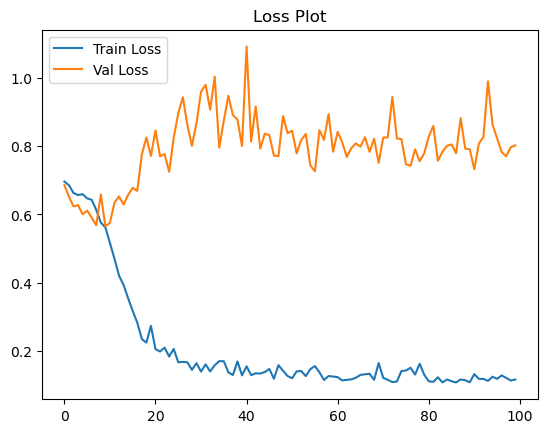

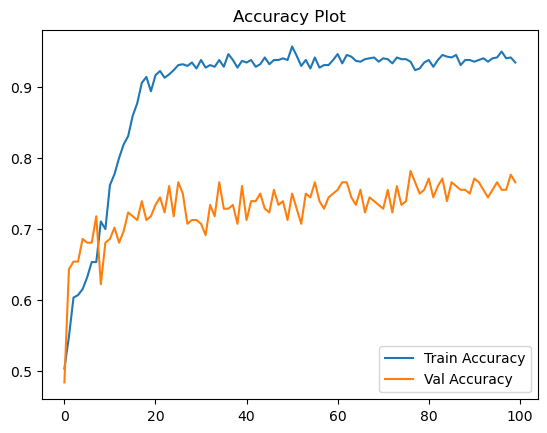

In [28]:
plot_loss_accuracy(history_V0.history)

In [36]:
model_V1 = tf.keras.Sequential([
                                tf.keras.layers.InputLayer(input_shape=(128,128,3)),
                                tf.keras.layers.Rescaling(1.0/255.0),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.SpatialDropout2D(0.42),
                                tf.keras.layers.MaxPooling2D(pool_size=2),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.SpatialDropout2D(0.47),
                                tf.keras.layers.MaxPooling2D(pool_size=2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Dropout(0.35),
                                tf.keras.layers.Dense(1,activation="sigmoid") 
])

In [37]:
model_V1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 126, 126, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 124, 124, 10)      910       
                                                                 
 spatial_dropout2d_2 (Spatia  (None, 124, 124, 10)     0         
 lDropout2D)                                                     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 10)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 60, 60, 10)       

In [38]:
model_V1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer="adam",
                 metrics=["accuracy"])

In [39]:
history_v1 = model_V1.fit(train_ds_128,
                          validation_data=test_ds_128,
                          steps_per_epoch=len(train_ds_128),
                          validation_steps=len(test_ds_128),
                          epochs=100,
                          batch_size=32,
                          validation_batch_size=32)

Epoch 1/100
27/27 [==============================] - 2s 49ms/step - loss: 0.7975 - accuracy: 0.4821 - val_loss: 0.6960 - val_accuracy: 0.4840
Epoch 2/100
27/27 [==============================] - 1s 40ms/step - loss: 0.7105 - accuracy: 0.5250 - val_loss: 0.6919 - val_accuracy: 0.5372
Epoch 3/100
27/27 [==============================] - 1s 39ms/step - loss: 0.6921 - accuracy: 0.5262 - val_loss: 0.6921 - val_accuracy: 0.5160
Epoch 4/100
27/27 [==============================] - 1s 37ms/step - loss: 0.6941 - accuracy: 0.5238 - val_loss: 0.6919 - val_accuracy: 0.5160
Epoch 5/100
27/27 [==============================] - 1s 37ms/step - loss: 0.6764 - accuracy: 0.5583 - val_loss: 0.6901 - val_accuracy: 0.4840
Epoch 6/100
27/27 [==============================] - 1s 38ms/step - loss: 0.6754 - accuracy: 0.5679 - val_loss: 0.6895 - val_accuracy: 0.4840
Epoch 7/100
27/27 [==============================] - 1s 39ms/step - loss: 0.6575 - accuracy: 0.5845 - val_loss: 0.6866 - val_accuracy: 0.5532
Epoch 

27/27 [==============================] - 1s 38ms/step - loss: 0.4347 - accuracy: 0.7845 - val_loss: 0.6642 - val_accuracy: 0.6862
Epoch 59/100
27/27 [==============================] - 1s 38ms/step - loss: 0.4399 - accuracy: 0.7833 - val_loss: 0.5609 - val_accuracy: 0.7553
Epoch 60/100
27/27 [==============================] - 1s 37ms/step - loss: 0.4112 - accuracy: 0.8131 - val_loss: 0.6189 - val_accuracy: 0.7234
Epoch 61/100
27/27 [==============================] - 1s 37ms/step - loss: 0.4337 - accuracy: 0.7821 - val_loss: 0.6513 - val_accuracy: 0.6915
Epoch 62/100
27/27 [==============================] - 1s 37ms/step - loss: 0.4172 - accuracy: 0.7964 - val_loss: 0.5925 - val_accuracy: 0.7128
Epoch 63/100
27/27 [==============================] - 1s 38ms/step - loss: 0.4270 - accuracy: 0.7952 - val_loss: 0.5844 - val_accuracy: 0.6915
Epoch 64/100
27/27 [==============================] - 1s 38ms/step - loss: 0.4560 - accuracy: 0.7810 - val_loss: 0.6210 - val_accuracy: 0.7447
Epoch 65/100

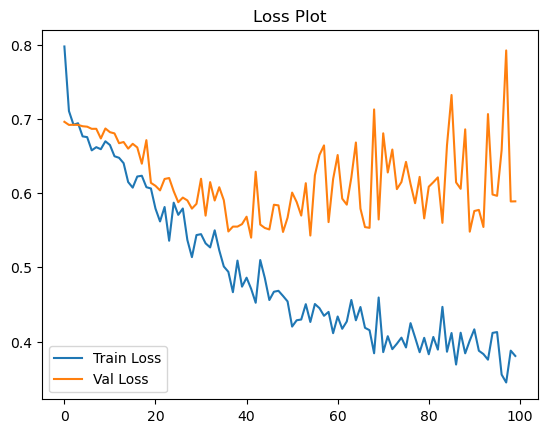

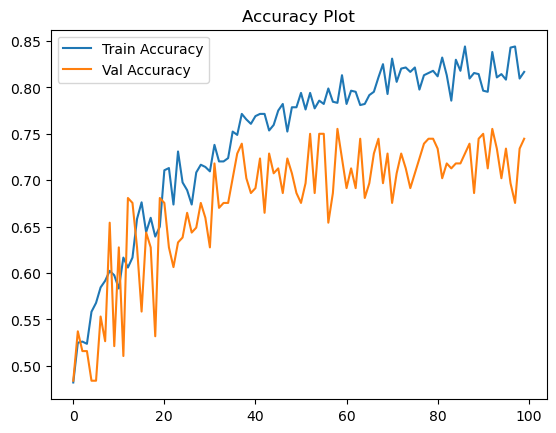

In [40]:
plot_loss_accuracy(history_v1.history)

In [45]:
model_V3 = tf.keras.Sequential([
                                tf.keras.layers.InputLayer(input_shape=(128,128,3)),
                                tf.keras.layers.Rescaling(1.0/255.0),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.SpatialDropout2D(0.42),
                                tf.keras.layers.MaxPooling2D(pool_size=2),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.Conv2D(10,kernel_size=(3,3),activation="relu"),
                                tf.keras.layers.SpatialDropout2D(0.47),
                                tf.keras.layers.MaxPooling2D(pool_size=2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Dropout(0.3),
                                tf.keras.layers.Dense(1024,activation="relu"),
                                tf.keras.layers.Dropout(0.3),
                                tf.keras.layers.Dense(256,activation="relu"),
                                tf.keras.layers.Dropout(0.3),
                                tf.keras.layers.Dense(64,activation="relu"),
                                tf.keras.layers.Dropout(0.3),
                                tf.keras.layers.Dense(1,activation="sigmoid")
])

In [47]:
model_V3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer="adam",
                 metrics=["accuracy"])

In [48]:
history_V3 = model_V3.fit(train_ds_128,
                          validation_data=test_ds_128,
                          steps_per_epoch=len(train_ds_128),
                          validation_steps=len(test_ds_128),
                          batch_size=32,
                          validation_batch_size=32,
                          epochs=100,
                          callbacks=[model_save_callback("Model_V3")])

Epoch 1/100
27/27 [==============================] - ETA: 0s - loss: 1.7439 - accuracy: 0.5012
Epoch 1: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_01.ckpt
27/27 [==============================] - 4s 97ms/step - loss: 1.7439 - accuracy: 0.5012 - val_loss: 0.7064 - val_accuracy: 0.4840
Epoch 2/100
26/27 [===========================>..] - ETA: 0s - loss: 0.8981 - accuracy: 0.4940
Epoch 2: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_02.ckpt
27/27 [==============================] - 4s 152ms/step - loss: 0.8937 - accuracy: 0.4964 - val_loss: 0.6919 - val_accuracy: 0.6170
Epoch 3/100
24/27 [=========================>....] - ETA: 0s - loss: 0.8693 - accuracy: 0.5130
Epoch 3: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_03.ckpt
27/27 [==============================] - 3s 96ms/step - loss: 0.8579 - accuracy: 0.5095 - val_loss: 0.6925 - val_accuracy: 0.5160
Epoch 4/100
26/27 [==

25/27 [==========================>...] - ETA: 0s - loss: 0.6761 - accuracy: 0.6087
Epoch 26: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_26.ckpt
27/27 [==============================] - 2s 89ms/step - loss: 0.6763 - accuracy: 0.6071 - val_loss: 0.6520 - val_accuracy: 0.6596
Epoch 27/100
25/27 [==========================>...] - ETA: 0s - loss: 0.6176 - accuracy: 0.6587
Epoch 27: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_27.ckpt
27/27 [==============================] - 2s 92ms/step - loss: 0.6162 - accuracy: 0.6631 - val_loss: 0.6237 - val_accuracy: 0.6436
Epoch 28/100
26/27 [===========================>..] - ETA: 0s - loss: 0.6164 - accuracy: 0.6430
Epoch 28: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_28.ckpt
27/27 [==============================] - 3s 95ms/step - loss: 0.6150 - accuracy: 0.6452 - val_loss: 0.5986 - val_accuracy: 0.6489
Epoch 29/100
25/27 [=========

Epoch 51/100
26/27 [===========================>..] - ETA: 0s - loss: 0.4605 - accuracy: 0.7308
Epoch 51: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_51.ckpt
27/27 [==============================] - 3s 114ms/step - loss: 0.4601 - accuracy: 0.7321 - val_loss: 0.7272 - val_accuracy: 0.6277
Epoch 52/100
25/27 [==========================>...] - ETA: 0s - loss: 0.4612 - accuracy: 0.7550
Epoch 52: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_52.ckpt
27/27 [==============================] - 2s 91ms/step - loss: 0.4585 - accuracy: 0.7560 - val_loss: 0.7621 - val_accuracy: 0.6968
Epoch 53/100
25/27 [==========================>...] - ETA: 0s - loss: 0.4106 - accuracy: 0.7925
Epoch 53: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_53.ckpt
27/27 [==============================] - 3s 95ms/step - loss: 0.4081 - accuracy: 0.7964 - val_loss: 0.8257 - val_accuracy: 0.6702
Epoch 54/100
24

Epoch 76/100
24/27 [=========================>....] - ETA: 0s - loss: 0.2785 - accuracy: 0.8698
Epoch 76: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_76.ckpt
27/27 [==============================] - 2s 93ms/step - loss: 0.2726 - accuracy: 0.8714 - val_loss: 1.4783 - val_accuracy: 0.6915
Epoch 77/100
25/27 [==========================>...] - ETA: 0s - loss: 0.2725 - accuracy: 0.8700
Epoch 77: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_77.ckpt
27/27 [==============================] - 2s 90ms/step - loss: 0.2771 - accuracy: 0.8690 - val_loss: 0.9937 - val_accuracy: 0.6968
Epoch 78/100
26/27 [===========================>..] - ETA: 0s - loss: 0.2981 - accuracy: 0.8642
Epoch 78: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V3\_78.ckpt
27/27 [==============================] - 3s 101ms/step - loss: 0.2999 - accuracy: 0.8619 - val_loss: 0.9309 - val_accuracy: 0.6702
Epoch 79/100
25

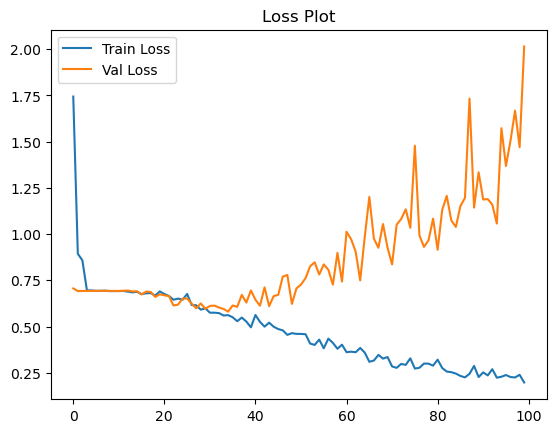

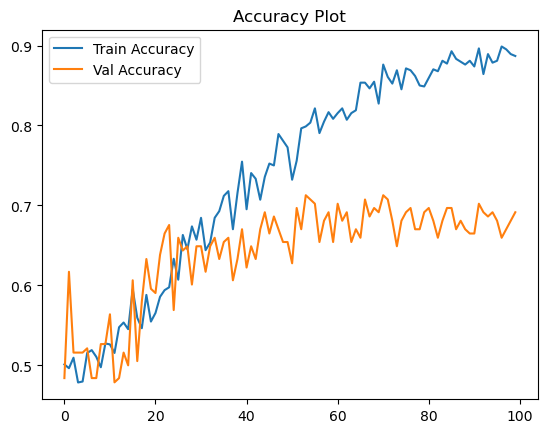

In [49]:
plot_loss_accuracy(history_V3.history)

In [61]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

In [62]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_9 (Rescaling)        (None, None, None,   0           ['input_8[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_2 (Normalization  (None, None, None,   7          ['rescaling_9[0][0]']            
 )                              3)                                                   

                                                                                                  
 block2a_se_excite (Multiply)   (None, None, None,   0           ['block2a_activation[0][0]',     
                                96)                               'block2a_se_expand[0][0]']      
                                                                                                  
 block2a_project_conv (Conv2D)  (None, None, None,   2304        ['block2a_se_excite[0][0]']      
                                24)                                                               
                                                                                                  
 block2a_project_bn (BatchNorma  (None, None, None,   96         ['block2a_project_conv[0][0]']   
 lization)                      24)                                                               
                                                                                                  
 block2b_e

                                144)                              'block3a_se_expand[0][0]']      
                                                                                                  
 block3a_project_conv (Conv2D)  (None, None, None,   5760        ['block3a_se_excite[0][0]']      
                                40)                                                               
                                                                                                  
 block3a_project_bn (BatchNorma  (None, None, None,   160        ['block3a_project_conv[0][0]']   
 lization)                      40)                                                               
                                                                                                  
 block3b_expand_conv (Conv2D)   (None, None, None,   9600        ['block3a_project_bn[0][0]']     
                                240)                                                              
          

 block4a_project_conv (Conv2D)  (None, None, None,   19200       ['block4a_se_excite[0][0]']      
                                80)                                                               
                                                                                                  
 block4a_project_bn (BatchNorma  (None, None, None,   320        ['block4a_project_conv[0][0]']   
 lization)                      80)                                                               
                                                                                                  
 block4b_expand_conv (Conv2D)   (None, None, None,   38400       ['block4a_project_bn[0][0]']     
                                480)                                                              
                                                                                                  
 block4b_expand_bn (BatchNormal  (None, None, None,   1920       ['block4b_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block4c_drop (Dropout)         (None, None, None,   0           ['block4c_project_bn[0][0]']     
                                80)                                                               
                                                                                                  
 block4c_add (Add)              (None, None, None,   0           ['block4c_drop[0][0]',           
                                80)                               'block4b_add[0][0]']            
                                                                                                  
 block5a_expand_conv (Conv2D)   (None, None, None,   38400       ['block4c_add[0][0]']            
                                480)                                                              
                                                                                                  
 block5a_e

                                112)                              'block5a_project_bn[0][0]']     
                                                                                                  
 block5c_expand_conv (Conv2D)   (None, None, None,   75264       ['block5b_add[0][0]']            
                                672)                                                              
                                                                                                  
 block5c_expand_bn (BatchNormal  (None, None, None,   2688       ['block5c_expand_conv[0][0]']    
 ization)                       672)                                                              
                                                                                                  
 block5c_expand_activation (Act  (None, None, None,   0          ['block5c_expand_bn[0][0]']      
 ivation)                       672)                                                              
          

 block6b_expand_conv (Conv2D)   (None, None, None,   221184      ['block6a_project_bn[0][0]']     
                                1152)                                                             
                                                                                                  
 block6b_expand_bn (BatchNormal  (None, None, None,   4608       ['block6b_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6b_expand_activation (Act  (None, None, None,   0          ['block6b_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, None, None,   28800      ['block6b_expand_activation[0][0]
 D)       

                                                                                                  
 block6d_expand_conv (Conv2D)   (None, None, None,   221184      ['block6c_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6d_expand_bn (BatchNormal  (None, None, None,   4608       ['block6d_expand_conv[0][0]']    
 ization)                       1152)                                                             
                                                                                                  
 block6d_expand_activation (Act  (None, None, None,   0          ['block6d_expand_bn[0][0]']      
 ivation)                       1152)                                                             
                                                                                                  
 block6d_d

                                1280)                                                             
                                                                                                  
 top_activation (Activation)    (None, None, None,   0           ['top_bn[0][0]']                 
                                1280)                                                             
                                                                                                  
Total params: 4,049,571
Trainable params: 0
Non-trainable params: 4,049,571
__________________________________________________________________________________________________


In [63]:
model_V4 = tf.keras.Sequential([
                                base_model,
                                tf.keras.layers.GlobalAvgPool2D(),
                                tf.keras.layers.Dropout(0.45),
                                tf.keras.layers.Dense(1024,activation="relu"),
                                tf.keras.layers.Dropout(0.45),
                                tf.keras.layers.Dense(512,activation="relu"),
                                tf.keras.layers.Dropout(0.45),
                                tf.keras.layers.Dense(64,activation="relu"),
                                tf.keras.layers.Dropout(0.45),
                                tf.keras.layers.Dense(1,activation="sigmoid")
])

In [64]:
model_V4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_14 (Dropout)        (None, 1280)              0         
                                                                 
 dense_15 (Dense)            (None, 1024)              1311744   
                                                                 
 dropout_15 (Dropout)        (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                      

In [65]:
model_V4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer="adam",
                 metrics=["accuracy"])

In [66]:
history_V4 = model_V4.fit(train_ds_128,
                          validation_data=test_ds_128,
                          steps_per_epoch=len(train_ds_128),
                          validation_steps=len(test_ds_128),
                          batch_size=32,
                          validation_batch_size=32,
                          epochs=100,
                          callbacks=[model_save_callback("Model_V4")])

Epoch 1/100
26/27 [===========================>..] - ETA: 0s - loss: 0.6545 - accuracy: 0.6094
Epoch 1: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_01.ckpt
27/27 [==============================] - 9s 153ms/step - loss: 0.6531 - accuracy: 0.6095 - val_loss: 0.3847 - val_accuracy: 0.8404
Epoch 2/100
25/27 [==========================>...] - ETA: 0s - loss: 0.5889 - accuracy: 0.6975
Epoch 2: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_02.ckpt
27/27 [==============================] - 2s 87ms/step - loss: 0.5829 - accuracy: 0.7012 - val_loss: 0.3796 - val_accuracy: 0.8404
Epoch 3/100
25/27 [==========================>...] - ETA: 0s - loss: 0.5608 - accuracy: 0.7188
Epoch 3: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_03.ckpt
27/27 [==============================] - 2s 90ms/step - loss: 0.5549 - accuracy: 0.7190 - val_loss: 0.3894 - val_accuracy: 0.8564
Epoch 4/100
25/27 [==

25/27 [==========================>...] - ETA: 0s - loss: 0.2454 - accuracy: 0.8863
Epoch 26: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_26.ckpt
27/27 [==============================] - 2s 83ms/step - loss: 0.2462 - accuracy: 0.8869 - val_loss: 0.4033 - val_accuracy: 0.8351
Epoch 27/100
25/27 [==========================>...] - ETA: 0s - loss: 0.2385 - accuracy: 0.8800
Epoch 27: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_27.ckpt
27/27 [==============================] - 2s 84ms/step - loss: 0.2343 - accuracy: 0.8833 - val_loss: 0.4223 - val_accuracy: 0.8351
Epoch 28/100
25/27 [==========================>...] - ETA: 0s - loss: 0.2261 - accuracy: 0.8950
Epoch 28: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_28.ckpt
27/27 [==============================] - 2s 82ms/step - loss: 0.2255 - accuracy: 0.8976 - val_loss: 0.3077 - val_accuracy: 0.8670
Epoch 29/100
25/27 [=========

25/27 [==========================>...] - ETA: 0s - loss: 0.1497 - accuracy: 0.9150
Epoch 51: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_51.ckpt
27/27 [==============================] - 2s 83ms/step - loss: 0.1458 - accuracy: 0.9179 - val_loss: 0.4394 - val_accuracy: 0.8298
Epoch 52/100
25/27 [==========================>...] - ETA: 0s - loss: 0.1278 - accuracy: 0.9425
Epoch 52: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_52.ckpt
27/27 [==============================] - 2s 93ms/step - loss: 0.1393 - accuracy: 0.9345 - val_loss: 0.4008 - val_accuracy: 0.8404
Epoch 53/100
25/27 [==========================>...] - ETA: 0s - loss: 0.1613 - accuracy: 0.9150
Epoch 53: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_53.ckpt
27/27 [==============================] - 2s 88ms/step - loss: 0.1615 - accuracy: 0.9143 - val_loss: 0.4349 - val_accuracy: 0.8245
Epoch 54/100
25/27 [=========

25/27 [==========================>...] - ETA: 0s - loss: 0.1584 - accuracy: 0.9250
Epoch 76: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_76.ckpt
27/27 [==============================] - 2s 85ms/step - loss: 0.1533 - accuracy: 0.9274 - val_loss: 0.3761 - val_accuracy: 0.8617
Epoch 77/100
25/27 [==========================>...] - ETA: 0s - loss: 0.1322 - accuracy: 0.9312
Epoch 77: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_77.ckpt
27/27 [==============================] - 2s 82ms/step - loss: 0.1315 - accuracy: 0.9310 - val_loss: 0.5231 - val_accuracy: 0.8351
Epoch 78/100
25/27 [==========================>...] - ETA: 0s - loss: 0.1153 - accuracy: 0.9325
Epoch 78: saving model to D:\CNNtest\TESNORFLOW PRACTICE DATASET\OutputData\ElephantModel_V4\_78.ckpt
27/27 [==============================] - 2s 91ms/step - loss: 0.1136 - accuracy: 0.9333 - val_loss: 0.4982 - val_accuracy: 0.8298
Epoch 79/100
25/27 [=========

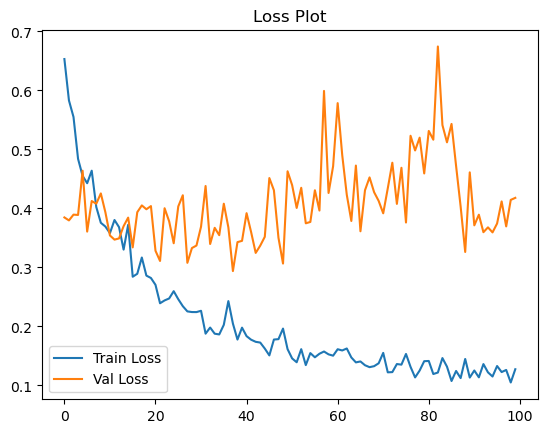

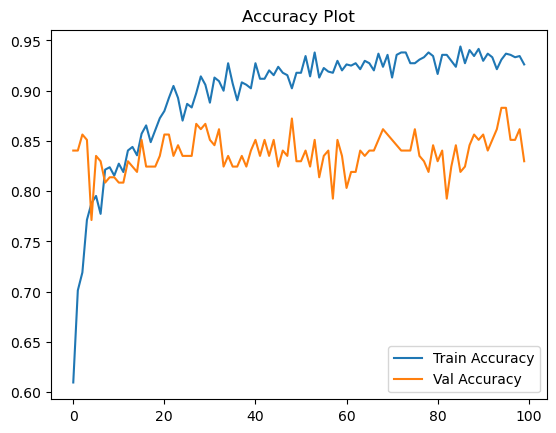

In [67]:
plot_loss_accuracy(history_V4.history)

In [68]:
model_V5 = tf.keras.Sequential([
                                base_model,
                                tf.keras.layers.GlobalAvgPool2D(),
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Dropout(0.45),
                                tf.keras.layers.Dense(1024,activation="relu"),
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Dropout(0.45),
                                tf.keras.layers.Dense(512,activation="relu"),
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Dropout(0.45),
                                tf.keras.layers.Dense(64,activation="relu"),
                                tf.keras.layers.BatchNormalization(),
                                tf.keras.layers.Dropout(0.45),
                                tf.keras.layers.Dense(1,activation="sigmoid")
])

In [69]:
model_V5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_3 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                                 
 dropout_18 (Dropout)        (None, 1280)              0         
                                                                 
 dense_19 (Dense)            (None, 1024)              1311744   
                                                                 
 batch_normalization_4 (Batc  (None, 1024)            

In [70]:
model_V5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer="adam",
                 metrics=["accuracy"])

In [71]:
history_V5 = model_V5.fit(train_ds_128,
                          validation_data=test_ds_128,
                          steps_per_epoch=len(train_ds_128),
                          validation_steps=len(test_ds_128),
                          batch_size=32,
                          validation_batch_size=32,
                          epochs=100)

Epoch 1/100
27/27 [==============================] - 8s 102ms/step - loss: 0.8796 - accuracy: 0.6024 - val_loss: 0.5362 - val_accuracy: 0.8032
Epoch 2/100
27/27 [==============================] - 2s 56ms/step - loss: 0.7060 - accuracy: 0.6833 - val_loss: 0.4971 - val_accuracy: 0.7979
Epoch 3/100
27/27 [==============================] - 2s 55ms/step - loss: 0.5965 - accuracy: 0.7321 - val_loss: 0.4520 - val_accuracy: 0.8032
Epoch 4/100
27/27 [==============================] - 2s 55ms/step - loss: 0.6133 - accuracy: 0.7202 - val_loss: 0.4353 - val_accuracy: 0.8032
Epoch 5/100
27/27 [==============================] - 1s 54ms/step - loss: 0.5301 - accuracy: 0.7619 - val_loss: 0.4107 - val_accuracy: 0.8298
Epoch 6/100
27/27 [==============================] - 2s 55ms/step - loss: 0.5051 - accuracy: 0.7702 - val_loss: 0.4001 - val_accuracy: 0.8298
Epoch 7/100
27/27 [==============================] - 2s 56ms/step - loss: 0.5061 - accuracy: 0.7750 - val_loss: 0.4224 - val_accuracy: 0.7766
Epoch

27/27 [==============================] - 2s 54ms/step - loss: 0.2117 - accuracy: 0.9119 - val_loss: 0.3622 - val_accuracy: 0.8457
Epoch 59/100
27/27 [==============================] - 2s 55ms/step - loss: 0.2018 - accuracy: 0.9083 - val_loss: 0.3545 - val_accuracy: 0.8564
Epoch 60/100
27/27 [==============================] - 2s 55ms/step - loss: 0.2406 - accuracy: 0.8821 - val_loss: 0.3486 - val_accuracy: 0.8564
Epoch 61/100
27/27 [==============================] - 2s 54ms/step - loss: 0.2181 - accuracy: 0.9095 - val_loss: 0.3578 - val_accuracy: 0.8564
Epoch 62/100
27/27 [==============================] - 1s 54ms/step - loss: 0.2437 - accuracy: 0.8893 - val_loss: 0.3622 - val_accuracy: 0.8511
Epoch 63/100
27/27 [==============================] - 2s 55ms/step - loss: 0.2098 - accuracy: 0.9214 - val_loss: 0.3711 - val_accuracy: 0.8511
Epoch 64/100
27/27 [==============================] - 1s 54ms/step - loss: 0.2418 - accuracy: 0.8952 - val_loss: 0.3724 - val_accuracy: 0.8670
Epoch 65/100

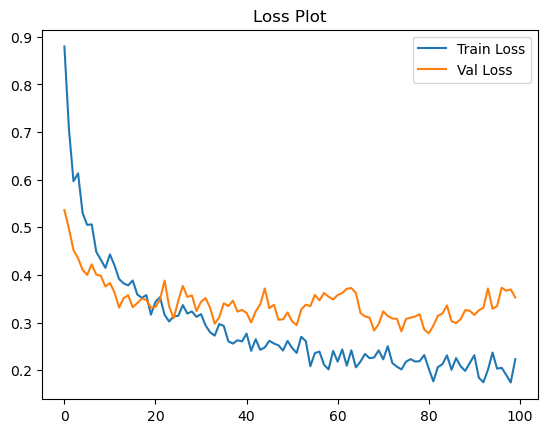

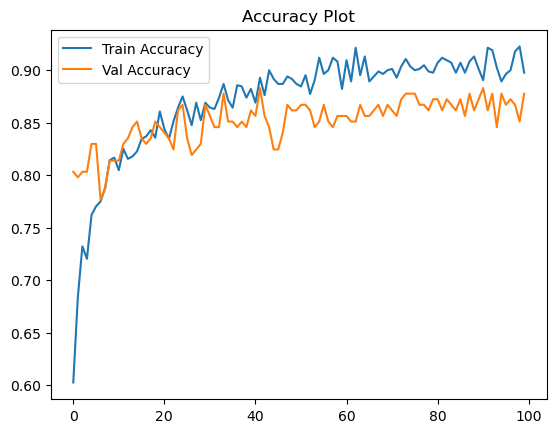

In [72]:
plot_loss_accuracy(history_V5.history)

In [73]:
base_model_fg = tf.keras.applications.EfficientNetB1()

32148312/32148312 [==============================] - 4s 0us/step


In [74]:
base_model_fg.summary()

Model: "efficientnetb1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_11 (Rescaling)       (None, 240, 240, 3)  0           ['input_9[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 240, 240, 3)  7          ['rescaling_11[0][0]']           
 )                                                                                                
                                                                                     

                                                                                                  
 block2a_expand_conv (Conv2D)   (None, 120, 120, 96  1536        ['block1b_add[0][0]']            
                                )                                                                 
                                                                                                  
 block2a_expand_bn (BatchNormal  (None, 120, 120, 96  384        ['block2a_expand_conv[0][0]']    
 ization)                       )                                                                 
                                                                                                  
 block2a_expand_activation (Act  (None, 120, 120, 96  0          ['block2a_expand_bn[0][0]']      
 ivation)                       )                                                                 
                                                                                                  
 block2a_d

 block2c_expand_activation (Act  (None, 60, 60, 144)  0          ['block2c_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block2c_dwconv (DepthwiseConv2  (None, 60, 60, 144)  1296       ['block2c_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block2c_bn (BatchNormalization  (None, 60, 60, 144)  576        ['block2c_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block2c_activation (Activation  (None, 60, 60, 144)  0          ['block2c_bn[0][0]']             
 )        

 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 30, 30, 240)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 240)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_s

 block4a_activation (Activation  (None, 15, 15, 240)  0          ['block4a_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block4a_se_squeeze (GlobalAver  (None, 240)         0           ['block4a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block4a_se_reshape (Reshape)   (None, 1, 1, 240)    0           ['block4a_se_squeeze[0][0]']     
                                                                                                  
 block4a_se_reduce (Conv2D)     (None, 1, 1, 10)     2410        ['block4a_se_reshape[0][0]']     
                                                                                                  
 block4a_s

 block4c_se_expand (Conv2D)     (None, 1, 1, 480)    10080       ['block4c_se_reduce[0][0]']      
                                                                                                  
 block4c_se_excite (Multiply)   (None, 15, 15, 480)  0           ['block4c_activation[0][0]',     
                                                                  'block4c_se_expand[0][0]']      
                                                                                                  
 block4c_project_conv (Conv2D)  (None, 15, 15, 80)   38400       ['block4c_se_excite[0][0]']      
                                                                                                  
 block4c_project_bn (BatchNorma  (None, 15, 15, 80)  320         ['block4c_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block4c_d

 block5a_project_conv (Conv2D)  (None, 15, 15, 112)  53760       ['block5a_se_excite[0][0]']      
                                                                                                  
 block5a_project_bn (BatchNorma  (None, 15, 15, 112)  448        ['block5a_project_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, 15, 15, 672)  75264       ['block5a_project_bn[0][0]']     
                                                                                                  
 block5b_expand_bn (BatchNormal  (None, 15, 15, 672)  2688       ['block5b_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5b_e

 block5d_expand_conv (Conv2D)   (None, 15, 15, 672)  75264       ['block5c_add[0][0]']            
                                                                                                  
 block5d_expand_bn (BatchNormal  (None, 15, 15, 672)  2688       ['block5d_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block5d_expand_activation (Act  (None, 15, 15, 672)  0          ['block5d_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block5d_dwconv (DepthwiseConv2  (None, 15, 15, 672)  16800      ['block5d_expand_activation[0][0]
 D)                                                              ']                               
          

                                                                                                  
 block6b_dwconv (DepthwiseConv2  (None, 8, 8, 1152)  28800       ['block6b_expand_activation[0][0]
 D)                                                              ']                               
                                                                                                  
 block6b_bn (BatchNormalization  (None, 8, 8, 1152)  4608        ['block6b_dwconv[0][0]']         
 )                                                                                                
                                                                                                  
 block6b_activation (Activation  (None, 8, 8, 1152)  0           ['block6b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6b_s

 )                                                                                                
                                                                                                  
 block6d_activation (Activation  (None, 8, 8, 1152)  0           ['block6d_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block6d_se_squeeze (GlobalAver  (None, 1152)        0           ['block6d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block6d_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block6d_se_squeeze[0][0]']     
                                                                                                  
 block6d_s

 block7a_se_squeeze (GlobalAver  (None, 1152)        0           ['block7a_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block7a_se_reshape (Reshape)   (None, 1, 1, 1152)   0           ['block7a_se_squeeze[0][0]']     
                                                                                                  
 block7a_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block7a_se_reshape[0][0]']     
                                                                                                  
 block7a_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block7a_se_reduce[0][0]']      
                                                                                                  
 block7a_se_excite (Multiply)   (None, 8, 8, 1152)   0           ['block7a_activation[0][0]',     
          